#РК-2 ММО
Ван Пэй
ИУ5И-22М

Вариант:  RandomForestClassifier	; Complement Naive Bayes (CNB)

In [ ]:
import numpy as np 
import pandas as pd 
pd.set_option('display.max_colwidth', 100)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
df = pd.read_csv("spam.csv",encoding='latin-1')

In [ ]:
df_nan_count = pd.DataFrame(df.isnull().sum())
df_nan_count = df_nan_count.reset_index()
df_nan_count.columns = ["colname","count of null value"]
display(df_nan_count)

,colname,count of null value
0,v1,0
1,v2,0
2,Unnamed: 2,5522
3,Unnamed: 3,5560
4,Unnamed: 4,5566


In [ ]:
df= df[['v1', 'v2']]
df_1= df_1[['v1', 'v2']]

In [ ]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [ ]:
pd.DataFrame(df["v1"].value_counts() / df["v1"].count().sum() * 100 )

,v1
ham,86.593683
spam,13.406317


In [ ]:
print("Input data has {} rows and {} columns".format(len(df), len(df.columns)))

Input data has 5572 rows and 2 columns


In [ ]:
df.columns = ['label', 'body_text']

In [ ]:
print("Out of {} rows, {} are spam, {} are ham".format(len(df),
                                                       len(df[df['label']=='spam']),
                                                       len(df[df['label']=='ham'])))

Out of 5572 rows, 747 are spam, 4825 are ham


In [ ]:
print("Number of null in label: {}".format(df['label'].isnull().sum()))
print("Number of null in text: {}".format(df['body_text'].isnull().sum()))

Number of null in label: 0
Number of null in text: 0


In [ ]:
import nltk
nltk.download('stopwords')
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
import string

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()



def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100


def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df['body_clean_text'] = df['body_text'].apply(lambda x: clean_text(x))
df['body_len'] = df['body_text'].apply(lambda x: len(x) - x.count(" "))
df['punct%'] = df['body_text'].apply(lambda x: count_punct(x))

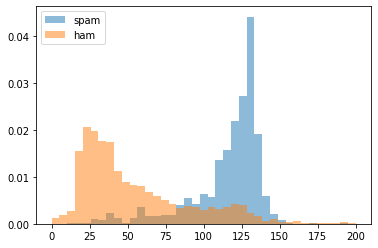

In [ ]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline
bins = np.linspace(0, 200, 40)

pyplot.hist(df[df['label']=='spam']['body_len'], bins, alpha=0.5, density = True, label='spam')
pyplot.hist(df[df['label']=='ham']['body_len'], bins, alpha=0.5, density = True, label='ham')
pyplot.legend(loc='upper left')
pyplot.show()

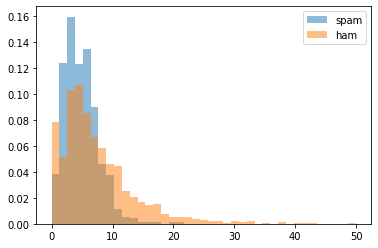

In [ ]:
bins = np.linspace(0, 50, 40)

pyplot.hist(df[df['label']=='spam']['punct%'], bins, alpha=0.5, density = True, label='spam')
pyplot.hist(df[df['label']=='ham']['punct%'], bins, alpha=0.5, density = True, label='ham')
pyplot.legend(loc='upper right')
pyplot.show()

Создать  TF-IDf и CountVectorizer

In [ ]:
# TF-IDF
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(df['body_text'])
X_tfidf_feat = pd.concat([df['body_len'], df['punct%'], pd.DataFrame(X_tfidf.toarray())], axis=1)

# CountVectorizer
count_vect = CountVectorizer(analyzer=clean_text)
X_count = count_vect.fit_transform(df['body_text'])
X_count_feat = pd.concat([df['body_len'], df['punct%'], pd.DataFrame(X_count.toarray())], axis=1)

X_count_feat.head()

,body_len,punct%,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,8020,8021,8022,8023,8024,8025,8026,8027,8028,8029,8030,8031,8032,8033,8034,8035,8036,8037,8038,8039,8040,8041,8042,8043,8044,8045,8046,8047,8048,8049,8050,8051,8052,8053,8054,8055,8056,8057,8058,8059
0,92,9.8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,24,25.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,128,4.7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,39,15.4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,49,4.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.head()

,label,body_text,body_clean_text,body_len,punct%
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...","[go, jurong, point, crazi, avail, bugi, n, great, world, la, e, buffet, cine, got, amor, wat]",92,9.8
1,ham,Ok lar... Joking wif u oni...,"[ok, lar, joke, wif, u, oni]",24,25.0
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv,...",128,4.7
3,ham,U dun say so early hor... U c already then say...,"[u, dun, say, earli, hor, u, c, alreadi, say]",39,15.4
4,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, dont, think, goe, usf, live, around, though]",49,4.1


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split
print(dir(RandomForestClassifier))
print(RandomForestClassifier()) # exploring hyperparameters

['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_estimator_type', '_get_param_names', '_get_tags', '_make_estimator', '_more_tags', '_required_parameters', '_set_oob_score', '_validate_X_predict', '_validate_estimator', '_validate_y_class_weight', 'apply', 'decision_path', 'feature_importances_', 'fit', 'get_params', 'predict', 'predict_log_proba', 'predict_proba', 'score', 'set_params']
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_sample

分出测试集和训练集

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf_feat, df['label'], test_size=0.2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=50, max_depth=20, n_jobs=-1)
rf_model = rf.fit(X_train, y_train)

In [ ]:
sorted(zip(rf_model.feature_importances_, X_train.columns), reverse=True)[0:10]

[(0.059909847233463084, 'body_len'),
 (0.04583549285541195, 8038),
 (0.034112666319669936, 5683),
 (0.029993193109238304, 3118),
 (0.028679253195039306, 7292),
 (0.022629381428073126, 2018),
 (0.019985468335243332, 6695),
 (0.01856465145632109, 1789),
 (0.017647335891347312, 6976),
 (0.016023078385443746, 391)]

In [ ]:
y_pred = rf_model.predict(X_test)
precision, recall, fscore, support = score(y_test, y_pred, pos_label='spam', average='binary')

In [ ]:
print('Precision: {} / Recall: {} / Accuracy: {}'.format(round(precision, 3),
                                                        round(recall, 3),
                                                        round((y_pred==y_test).sum() / len(y_pred),3)))


Precision: 1.0 / Recall: 0.618 / Accuracy: 0.939


 Naive Bayes

Build Vocab

In [ ]:
df = pd.read_csv("spam.csv",encoding='latin-1')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(list(df['v2']), list(df['v1']), test_size=0.2, random_state=0) 
print(f'Training Set: X_train Shape: {len(X_train)} | y_train Shape: {len(y_train)}')
print(f'Validation Set: X_val Shape: {len(X_val)} | y_val Shape: {len(y_val)}')

Training Set: X_train Shape: 4457 | y_train Shape: 4457
Validation Set: X_val Shape: 1115 | y_val Shape: 1115


In [ ]:
from tqdm import tqdm

In [ ]:
class tokenizer:
    def __init__(self, text_data):
        self.vocab = {}
        self.__get_vocab(text_data)
        
    def convert_text_dataset_to_matrix(self, X):
        vocab = self.vocab
        result = []       
        for text in tqdm(X):
            vector = self.__text_to_vector(text)
            result.append(vector)
        return result
    def __get_vocab(self, text_data):
        word_id = 0
        for text in text_data:
            words = text.split()
            for word in words:
                word = word.lower()
                if word not in self.vocab:
                    self.vocab[word] = word_id
                    word_id += 1
        print(f'Length of Dictionary: {len(self.vocab)}')
    
    def __text_to_vector(self, text):
        vocab = self.vocab
        result = list(np.zeros(len(vocab)))
        words = text.split()
        for word in words:
            word = word.lower()
            if word in vocab:
                result[vocab[word]] += 1
        return result

In [ ]:
tz = tokenizer(X_train)

Length of Dictionary: 11706


In [ ]:
X_train_matrix = tz.convert_text_dataset_to_matrix(X_train)
X_val_matrix = tz.convert_text_dataset_to_matrix(X_val)

100%|██████████| 1115/1115 [00:00<00:00, 1221.71it/s]


 Naive Bayes Model

In [ ]:
from matplotlib import pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
def plot_confusion_matrix(conf_mtrx, classes, cmap=plt.cm.Blues):
    num_class = conf_mtrx.shape[0]
    
    fig, ax = plt.subplots()
    im = ax.imshow(conf_mtrx, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(num_class), yticks=np.arange(num_class),
           xticklabels=classes, yticklabels=classes, 
           ylabel='True label', xlabel='Predicted label')

    middle_threshold = conf_mtrx.max() / 2.
    for row in range(num_class):
        for col in range(num_class):
            ax.text(col, row, format(conf_mtrx[row, col], '.0f'), ha="center", va="center",
                    color="white" if conf_mtrx[row, col] > middle_threshold else "black")
    fig.tight_layout()
    plt.show()

In [ ]:
nb = MultinomialNB()
nb.fit(X_train_matrix, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
y_pred = nb.predict(X_val_matrix)

In [ ]:
print('Accuracy: ', accuracy_score(y_val, y_pred))
print('Confusion Matrix')
print(confusion_matrix(y_val, y_pred))
print('Classification Report')
print(classification_report(y_val, y_pred))

Accuracy:  0.9775784753363229
Confusion Matrix
[[948   1]
 [ 24 142]]
Classification Report
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       949
        spam       0.99      0.86      0.92       166

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



Лучшую точночть показал CountVectorizer и Complement Naive Bayes (CNB).

